# Data Mining and Statistics
## Session 4 - Regression Analysis - ANSWERS
*Peter Stikker - Haarlem, the Netherlands*

----

In [2]:
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    

# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    
    
# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

try:
    import seaborn as sns
    print('statsmodels already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('statsmodels was not installed, installed and imported')

pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported
statsmodels already installed, only imported


In [3]:
soccerDF=pd.read_csv('data/Soccer2019C.csv')

In [4]:
x = soccerDF["Age"].to_numpy().reshape((-1,1))
y = soccerDF["Overall"].to_numpy().reshape((-1,1))

**The manual calculation:**

In [5]:
sx2 = x.var()
mxy = np.array(x*y).mean()
b1=(mxy-x.mean()*y.mean())/sx2
print("The coefficient (b1): ",b1)

b0=y.mean()-b1*x.mean()
print("The intercept (b0): ",b0)

The coefficient (b1):  0.670753275452498
The intercept (b0):  49.39888516650534


**Using sklearn:**

In [6]:
x=x.reshape((-1,1))
y=y.reshape((-1,1))

model = LinearRegression().fit(x,y)
b1=model.coef_[0]
print('The slope (b1): ',b1[0])

b0=model.intercept_
print('The intercept (b0): ',b0[0])

yPred = model.predict(x)

det=metrics.r2_score(y,yPred)
print('Coefficient of determination: ',det)

The slope (b1):  0.6707532754524893
The intercept (b0):  49.39888516650555
Coefficient of determination:  0.20527180741220818


**Using statsmodels:**

In [7]:
X=soccerDF["Age"]
X=sm.add_constant(X)
model = sm.OLS(soccerDF["Overall"],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4690.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        16:24:32   Log-Likelihood:                -58793.
No. Observations:               18159   AIC:                         1.176e+05
Df Residuals:                   18157   BIC:                         1.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3989      0.250    197.374      0.000      48.908      49.889
Age            0.6708      0.010     68.482      0.000       0.652       0.690
==============================================================================
Omnibus:                      363.074   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.544
Skew:                           0.321   Prob(JB):                     1.05e-87
Kurtosis:                       3.341   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My take on a function for linear regression:

In [17]:
def linearRegression(x_res, y_res):
    model = LinearRegression().fit(x_res, y_res)
    yPred = model.predict(x_res)
    b1V2=model.coef_[0]
    print('The slope (b1): ',b1V2)

    b0V2=model.intercept_
    print('The intercept (b0): ',b0V2[0])
    det2 = metrics.r2_score(y_res, yPred)
    print('Coefficient of determination: ',det2)

linearRegression(x, y)

The slope (b1):  [0.67075328]
The intercept (b0):  49.39888516650555
Coefficient of determination:  0.20527180741220818


Now to find out which variable has the highest correlation. Micha is a big fan of seaborn and liked to visualize this by creating all scatterplots between all possible pairs of variables: 

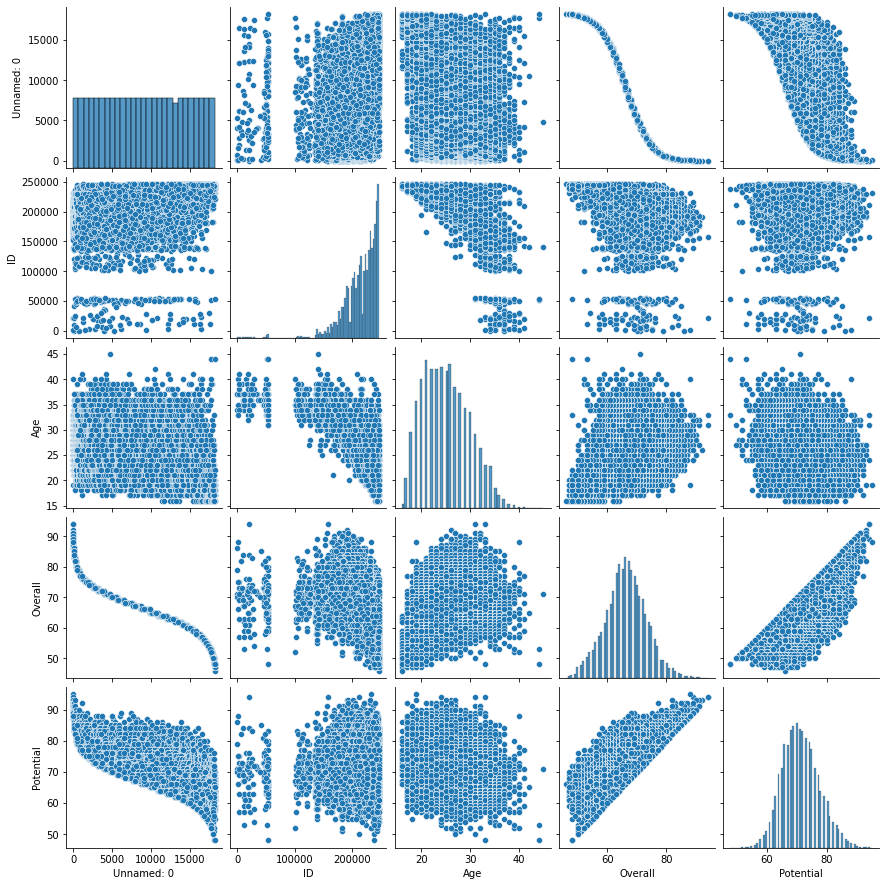

In [9]:
soccerLim =soccerDF.iloc[:,0:10] # Showing this for all variables will simply take too much time for now, so just to get an example limit the data
sns.pairplot(soccerLim) # Show the scatterplots of each possible pair of variables

The full version would be a bit impracticle. He also used a heat map. Looks also nice:

<AxesSubplot:>

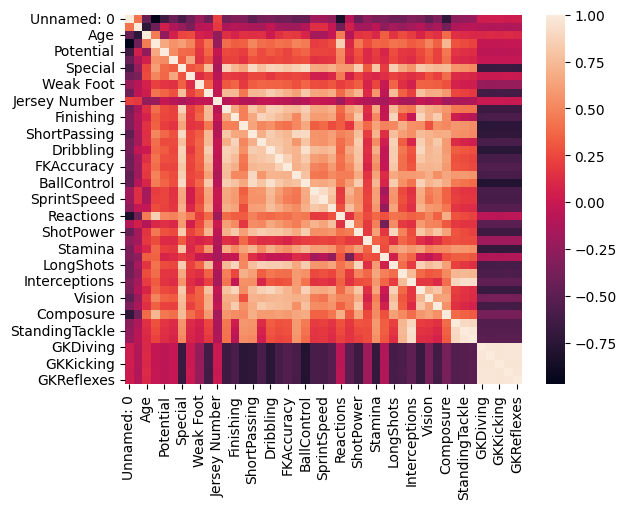

In [10]:
sns.heatmap(soccerDF.corr()) # show a heatmap which columns are corrolated.

I'm more of a numbers guy myself. We can generate a so-called correlation matrix using our pandas dataframe.

In [11]:
corrMatrix=soccerDF.corr(method='pearson')
corrMatrix.head()

,Unnamed: 0,ID,Age,Overall,Potential,ValueInK,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.416108,-0.455707,-0.972796,-0.633444,-0.442429,-0.596913,-0.413322,-0.204026,-0.415672,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.416108,1.000000,-0.739162,-0.417354,0.046577,-0.118782,-0.231366,-0.356191,-0.075784,-0.056914,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.455707,-0.739162,1.000000,0.453069,-0.252281,0.055641,0.236875,0.253765,0.059867,0.027649,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972796,-0.417354,0.453069,1.000000,0.661180,0.560734,0.607236,0.499491,0.212015,0.414463,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633444,0.046577,-0.252281,0.661180,1.000000,0.524015,0.384598,0.372993,0.162346,0.354290,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341


To determine the one with the best determination coefficient, we simply square the results:

In [12]:
detMatrix=corrMatrix**2
detMatrix.head()

,Unnamed: 0,ID,Age,Overall,Potential,ValueInK,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.173146,0.207669,0.946332,0.401251,0.195743,0.356305,0.170835,0.041627,0.172783,...,0.114175,0.512904,0.078865,0.061784,0.048415,0.000770,0.000730,0.000940,0.000394,0.000656
ID,0.173146,1.000000,0.546360,0.174185,0.002169,0.014109,0.053530,0.126872,0.005743,0.003239,...,0.019784,0.147819,0.012144,0.007384,0.004680,0.011150,0.012354,0.011375,0.013983,0.011189
Age,0.207669,0.546360,1.000000,0.205272,0.063646,0.003096,0.056110,0.064397,0.003584,0.000764,...,0.019470,0.152899,0.020397,0.014339,0.010627,0.010257,0.011325,0.011017,0.013549,0.010673
Overall,0.946332,0.174185,0.205272,1.000000,0.437159,0.314422,0.368736,0.249491,0.044951,0.171780,...,0.116574,0.529482,0.082085,0.063821,0.049645,0.000673,0.000628,0.000863,0.000312,0.000542
Potential,0.401251,0.002169,0.063646,0.437159,1.000000,0.274591,0.147915,0.139124,0.026356,0.125521,...,0.050302,0.193607,0.026504,0.020611,0.016636,0.002856,0.002989,0.003488,0.002766,0.002845


Then replace the 1's with a 0 (to avoid getting the diagonal), and determine the maximum:

In [13]:
detMatrix = detMatrix.replace(1,0)
maxRsquare=detMatrix.values.max()
maxRsquare

0.9499600357696804

Okay, uhm but between which two is this:

In [14]:
for column in detMatrix:
    if detMatrix[column].values.max()==maxRsquare:
        print(column)

StandingTackle
SlidingTackle


Great, lets check:

In [15]:
X=soccerDF["StandingTackle"]
X=sm.add_constant(X)
model = sm.OLS(soccerDF["SlidingTackle"],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SlidingTackle   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 3.447e+05
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        16:24:37   Log-Likelihood:                -54107.
No. Observations:               18159   AIC:                         1.082e+05
Df Residuals:                   18157   BIC:                         1.082e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0232      0.085     -0.272      0.786      -0.191       0.144
StandingTackle     0.9578      0.002    587.106      0.000       0.955       0.961
==============================================================================
Omnibus:                     2790.714   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12353.687
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       6.795   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""